In [76]:
from time import sleep
from json import loads
from kafka import KafkaConsumerresult = result.sort_values(by='AverageBillingAmount', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(result['AverageBillingAmount'], labels=result['Insurance Provider'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
ax.set_title('Average Billing Amount by Insurance Provider')

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  
plt.tight_layout()
plt.show()
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 393.8 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 853.3 kB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2d/d5/6227732ecab9165586966ccb54301e3164f61b470c954c4cf6940654fbe1/matplotlib-3.8.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/d6/4f/76d0dd0bca417691918484c26c74dd9dd44fbf528bbfeb30d754886e2c54/contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/c5/d4/f426fa1ca42e47bcfff0c878fa9d49d9c03379d00903a7c178f95b97867a/fonttools-4.51.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ---- -------------------------------- 20.5/162.8 kB 640.0 kB/s e


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.sql.functions import col, rank
from pyspark.sql.window import Window
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, DateType

In [59]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("HealthDataAnalysis") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()

In [27]:
schema = StructType([
    StructField("Name", StringType(), True),
    StructField("Age", IntegerType(), True),
    StructField("Gender", StringType(), True),
    StructField("Blood_Type", StringType(), True),
    StructField("Medical_Condition", StringType(), True),
    StructField("Date_of_Admission", DateType(), True),
    StructField("Doctor", StringType(), True),
    StructField("Hospital", StringType(), True),
    StructField("Insurance_Provider", StringType(), True),
    StructField("Billing_Amount", FloatType(), True),
    StructField("Room_Number", IntegerType(), True),
    StructField("Admission_Type", StringType(), True),
    StructField("Discharge _Date", DateType(), True),
    StructField("Medication", StringType(), True),
    StructField("Test_Results", StringType(), True)
])

In [6]:
# df = spark.createDataFrame(spark.sparkContext.emptyRDD(), schema)

In [7]:
# df.show()

In [28]:
consumer = KafkaConsumer('CovidData', bootstrap_servers='localhost:9092',
                         value_deserializer=lambda x: loads(x.decode('utf-8')))

In [29]:
#df = Dataframe()
print(consumer)
consumer

In [30]:
data =[]
for consumer_data in consumer:
    data = consumer_data.value
    break
dataList = json.loads(data)

In [31]:
df = pd.DataFrame(dataList)

In [32]:
df.to_csv("HealthCareDataSet", index=False)

In [33]:
spark = SparkSession.builder.getOrCreate()

In [34]:
healthcareData = spark.read.format('csv').option('header','true').load('HealthCareDataSet')
healthcareData.createOrReplaceTempView('healthData_stats')
healthcareData.show()

+--------------------+---+------+----------+-----------------+-----------------+------------------+--------------------+------------------+--------------+-----------+--------------+--------------+-----------+------------+
|                Name|Age|Gender|Blood Type|Medical Condition|Date of Admission|            Doctor|            Hospital|Insurance Provider|Billing Amount|Room Number|Admission Type|Discharge Date| Medication|Test Results|
+--------------------+---+------+----------+-----------------+-----------------+------------------+--------------------+------------------+--------------+-----------+--------------+--------------+-----------+------------+
|     Tiffany Ramirez| 81|Female|        O-|         Diabetes|       11/17/2022|    Patrick Parker|    Wallace-Hamilton|          Medicare|   37490.98336|        146|      Elective|     12/1/2022|    Aspirin|Inconclusive|
|         Ruben Burns| 35|  Male|        O+|           Asthma|         6/1/2023|     Diane Jackson|Burke, Griffi

Goal1: Identify patient with the highest billing amount within medical condition.


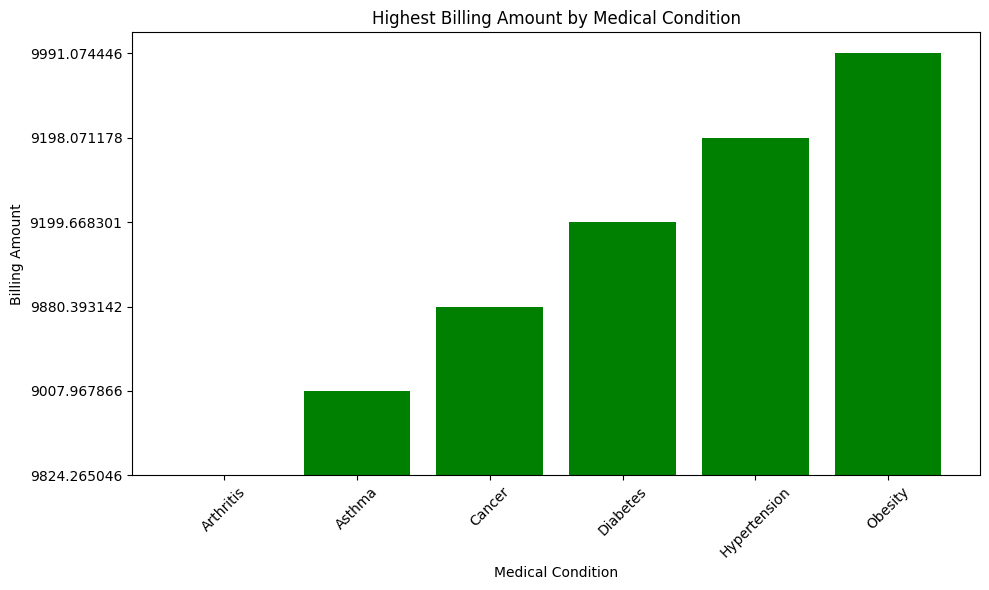

In [35]:
print("Goal1: Identify patient with the highest billing amount within medical condition.")
result_df=spark.sql("""
SELECT 
    Name,
    `Medical Condition`,
    `Billing Amount`
FROM (
    SELECT 
        Name,
        `Medical Condition`,
        `Billing Amount`,
        RANK() OVER (PARTITION BY `Medical Condition` ORDER BY `Billing Amount` DESC) AS Billing_Rank
    FROM 
        healthData_stats
) ranked_data
WHERE Billing_Rank = 1
""")

# Convert Spark DataFrame to Pandas DataFrame
result_pandas_df = result_df.toPandas()

# Plotting the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(result_pandas_df['Medical Condition'], result_pandas_df['Billing Amount'], color='green')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.title('Highest Billing Amount by Medical Condition')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Goal2: Find the most common medication prescribed for each medical condition and determine its usage frequency
+-----------------+-----------+--------------+
|Medical Condition| Medication|UsageFrequency|
+-----------------+-----------+--------------+
|        Arthritis|  Ibuprofen|            19|
|        Arthritis|Paracetamol|            17|
|        Arthritis|    Lipitor|            17|
|        Arthritis|    Aspirin|            17|
|        Arthritis| Penicillin|            16|
|           Asthma|  Ibuprofen|            23|
|           Asthma|    Aspirin|            21|
|           Asthma| Penicillin|            18|
|           Asthma|Paracetamol|            16|
|           Asthma|    Lipitor|            12|
|           Cancer|    Lipitor|            23|
|           Cancer| Penicillin|            23|
|           Cancer|  Ibuprofen|            20|
|           Cancer|Paracetamol|            14|
|           Cancer|    Aspirin|            11|
|         Diabetes|    Aspirin|            

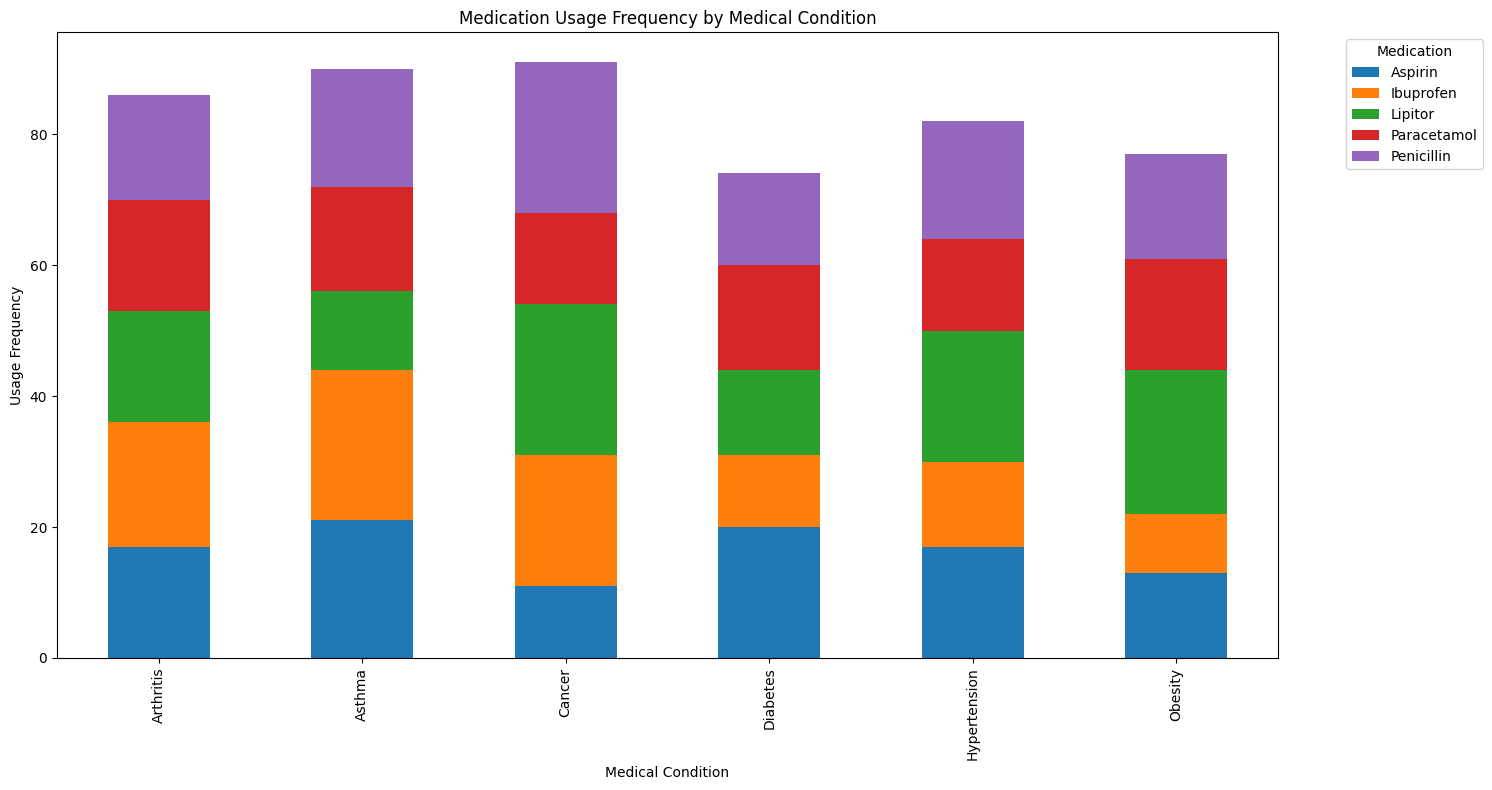

In [36]:
print("Goal2: Find the most common medication prescribed for each medical condition and determine its usage frequency")
Query = """
SELECT `Medical Condition`, Medication, COUNT(*) AS UsageFrequency
FROM healthData_stats
GROUP BY `Medical Condition`, Medication
ORDER BY `Medical Condition`, UsageFrequency DESC
"""
output = spark.sql(Query)
output.show()
result = output.toPandas()

# Pivot the dataframe for better visualization
pivot_df = result.pivot(index='Medical Condition', columns='Medication', values='UsageFrequency').fillna(0)

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Medication Usage Frequency by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Usage Frequency')
plt.legend(title='Medication', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Goal3: Calculate the average billing amount for patients with arthritis who were admitted as elective cases, grouped by insurance provider, and display the average billing amount and the number of patients for each insurance provider.
+------------------+------------------+------------+
|Insurance Provider|  AvgBillingAmount|PatientCount|
+------------------+------------------+------------+
|          Medicare|     33383.5949775|           4|
|        Blue Cross|29872.687705000004|           6|
|  UnitedHealthcare|24827.954968000002|           3|
|             Cigna|      23030.050025|           2|
|             Aetna|16293.440301999999|           5|
+------------------+------------------+------------+



C:\Users\s558944\AppData\Local\Temp\ipykernel_12652\3038782794.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df["Insurance Provider"], rotation=45, ha='right')


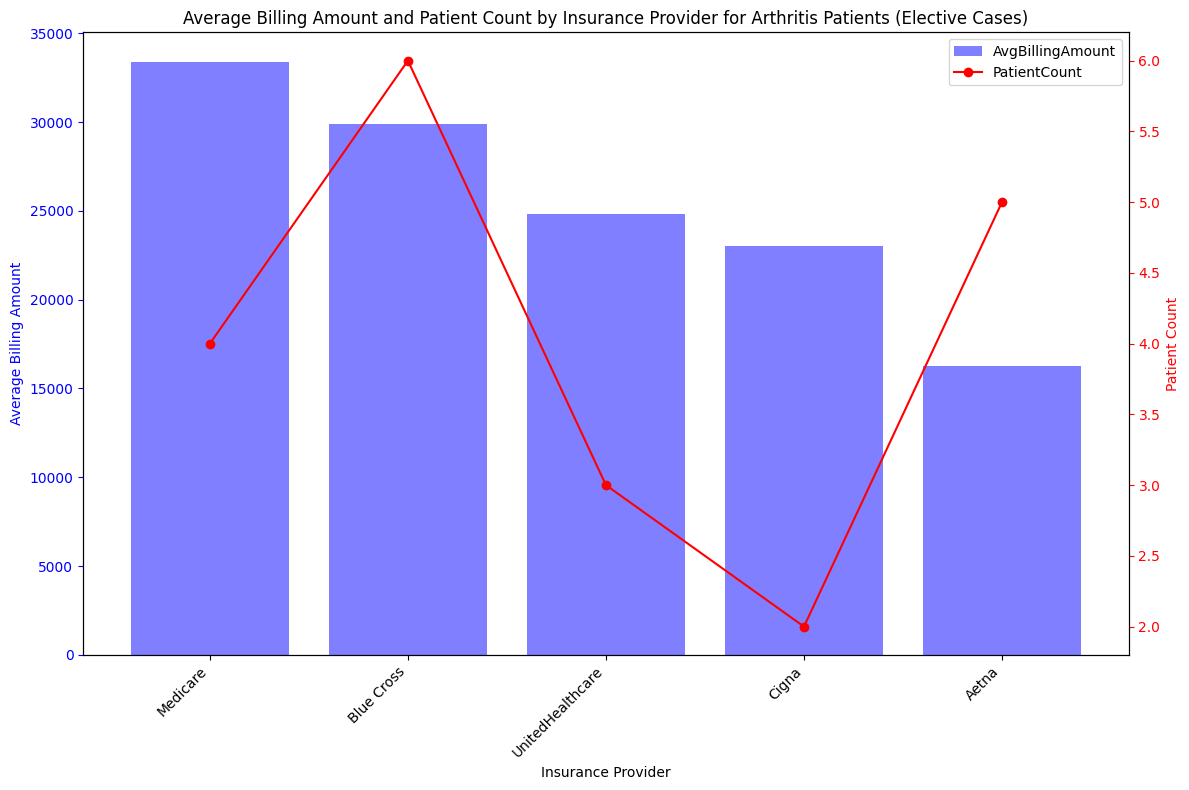

In [37]:
print("Goal3: Calculate the average billing amount for patients with arthritis who were admitted as elective cases, grouped by insurance provider, and display the average billing amount and the number of patients for each insurance provider.")
Query = """
SELECT 
    `Insurance Provider`, 
    AVG(`Billing Amount`) AS AvgBillingAmount, 
    COUNT(*) AS PatientCount
FROM 
    healthData_stats
WHERE 
    `Medical Condition` = 'Arthritis' AND `Admission Type` = 'Elective'
GROUP BY 
    `Insurance Provider`
ORDER BY 
    AvgBillingAmount DESC;
"""

output = spark.sql(Query)
output.show()

# Convert Spark DataFrame to Pandas DataFrame
df = output.toPandas()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for Average Billing Amount
ax1.bar(df["Insurance Provider"], df["AvgBillingAmount"], color='b', alpha=0.5, label='AvgBillingAmount')
ax1.set_xlabel('Insurance Provider')
ax1.set_ylabel('Average Billing Amount', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticklabels(df["Insurance Provider"], rotation=45, ha='right')

# Create another y-axis for Patient Count
ax2 = ax1.twinx()
ax2.plot(df["Insurance Provider"], df["PatientCount"], color='r', marker='o', label='PatientCount')
ax2.set_ylabel('Patient Count', color='r')
ax2.tick_params('y', colors='r')

# Add title and legend
plt.title('Average Billing Amount and Patient Count by Insurance Provider for Arthritis Patients (Elective Cases)')
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

Goal4: Identify the top 3 doctors who have treated the most patients with abnormal test results, and display the number of patients treated by each of these doctors.
+---------------+---------------------+
|         Doctor|AbnormalPatientsCount|
+---------------+---------------------+
|   Annette Cook|                    1|
|  Michael Smith|                    1|
|Charles Clayton|                    1|
+---------------+---------------------+



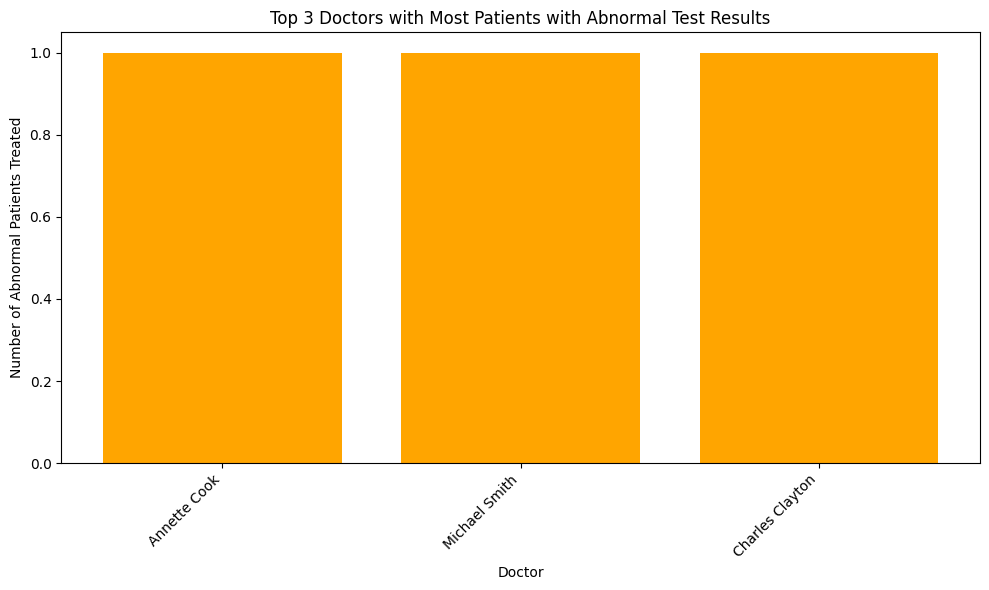

In [87]:
print("Goal4: Identify the top 3 doctors who have treated the most patients with abnormal test results, and display the number of patients treated by each of these doctors.")
Query = """
SELECT 
    Doctor, 
    COUNT(*) AS AbnormalPatientsCount
FROM 
    healthData_stats
WHERE 
    `Test Results` = 'Abnormal'
GROUP BY 
    Doctor
ORDER BY 
    AbnormalPatientsCount DESC
LIMIT 3;

"""
output = spark.sql(Query)
output.show()
result = output.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(result["Doctor"], result["AbnormalPatientsCount"], color='orange', alpha= 1)
plt.xlabel('Doctor')
plt.ylabel('Number of Abnormal Patients Treated')
plt.title('Top 3 Doctors with Most Patients with Abnormal Test Results')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



Goal4: Identify the top 5 insurance providers with the highest average billing amount for patients with diabetes who were admitted as elective cases, and display both the average billing amount and the number of such patients for each of these insurance providers.
+------------------+------------------+----------------+
|Insurance Provider|  AvgBillingAmount|NumberOfPatients|
+------------------+------------------+----------------+
|             Cigna|29425.397006000003|               5|
|        Blue Cross|       27337.43719|               6|
|  UnitedHealthcare|26479.231905166667|               6|
|          Medicare|       23440.88778|               3|
|             Aetna|16106.556195200003|               5|
+------------------+------------------+----------------+



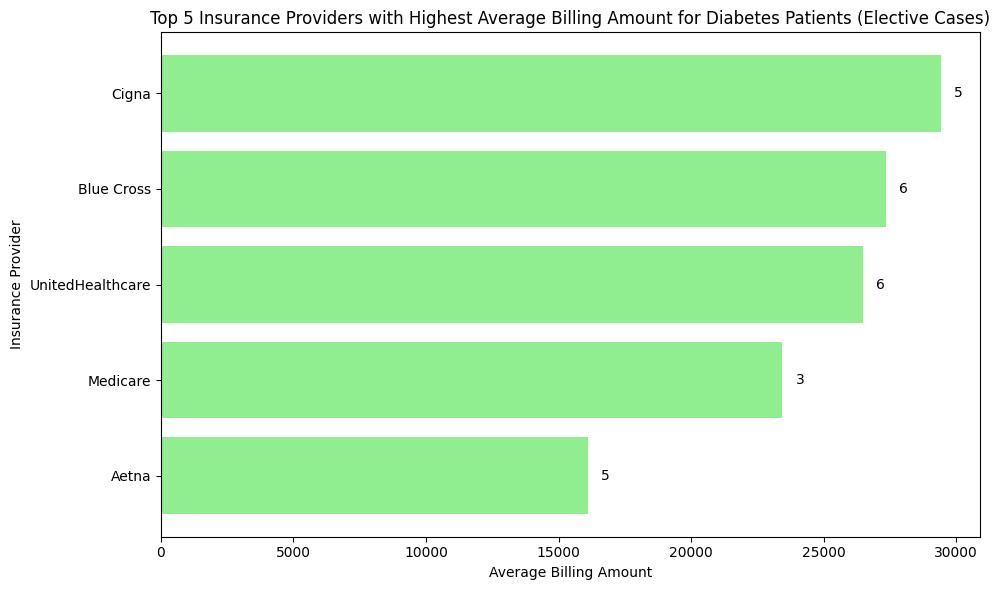

In [90]:
print("Goal4: Identify the top 5 insurance providers with the highest average billing amount for patients with diabetes who were admitted as elective cases, and display both the average billing amount and the number of such patients for each of these insurance providers.")
Query = """
SELECT 
    `Insurance Provider`, 
    AVG(`Billing Amount`) AS AvgBillingAmount,
    COUNT(*) AS NumberOfPatients
FROM 
    healthData_stats
WHERE 
    `Medical Condition` = 'Diabetes' AND `Admission Type` = 'Elective'
GROUP BY 
    `Insurance Provider`
ORDER BY 
    AvgBillingAmount DESC
LIMIT 5;

"""
output = spark.sql(Query)
output.show()
result = output.toPandas()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(result["Insurance Provider"], result["AvgBillingAmount"], color='lightgreen', alpha= 1)
ax.set_xlabel('Average Billing Amount')
ax.set_ylabel('Insurance Provider')
ax.set_title('Top 5 Insurance Providers with Highest Average Billing Amount for Diabetes Patients (Elective Cases)')
ax.invert_yaxis()  # Invert y-axis to display the highest value at the top

# Adding the number of patients as annotations
for i, v in enumerate(result["NumberOfPatients"]):
    ax.text(result["AvgBillingAmount"][i] + 500, i, str(v), color='black', verticalalignment='center')

plt.tight_layout()
plt.show()

Goal5: Determine the average billing amount for patients across different insurance providers,sorted in descending order by the average billing amount.
+------------------+--------------------+
|Insurance Provider|AverageBillingAmount|
+------------------+--------------------+
|             Cigna|   25875.54139965518|
|        Blue Cross|  25639.956039392153|
|             Aetna|   24990.35908762244|
|  UnitedHealthcare|   24184.20859543373|
|          Medicare|   24114.75047591089|
+------------------+--------------------+



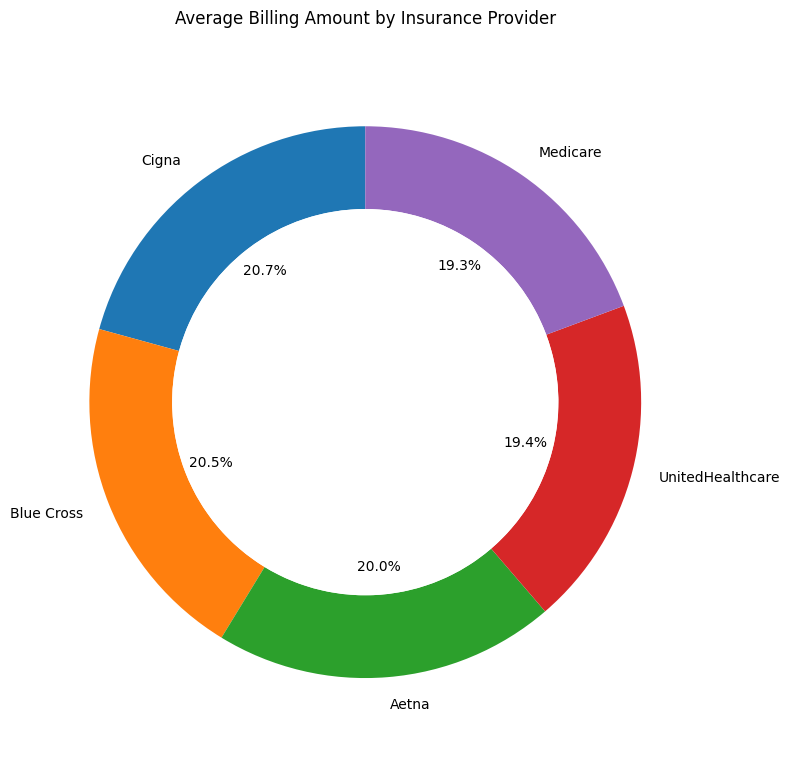

In [122]:
print("Goal5: Determine the average billing amount for patients across different insurance providers,sorted in descending order by the average billing amount.")
Query = """
SELECT `Insurance Provider`, AVG(`Billing Amount`) AS AverageBillingAmount
FROM healthData_stats
GROUP BY `Insurance Provider`
ORDER BY AverageBillingAmount DESC
"""
output = spark.sql(Query)
output.show()
result = output.toPandas()

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(result['AverageBillingAmount'], labels=result['Insurance Provider'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
ax.set_title('Average Billing Amount by Insurance Provider')

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  
plt.tight_layout()
plt.show()

Goal6: Analyze the distribution of patients with diabetes and asthma based on age groups and gender.
+---------+------+-----------------+------------------+
|Age_Group|Gender|Medical Condition|Number_of_Patients|
+---------+------+-----------------+------------------+
|     0-19|Female|           Asthma|                 1|
|     0-19|Female|         Diabetes|                 1|
|     0-19|  Male|           Asthma|                 2|
|    20-29|Female|           Asthma|                 6|
|    20-29|Female|         Diabetes|                 5|
|    20-29|  Male|           Asthma|                 5|
|    20-29|  Male|         Diabetes|                 1|
|    30-39|Female|           Asthma|                 5|
|    30-39|Female|         Diabetes|                 9|
|    30-39|  Male|           Asthma|                 5|
|    30-39|  Male|         Diabetes|                 6|
|    40-49|Female|           Asthma|                 8|
|    40-49|Female|         Diabetes|                 7|
|  

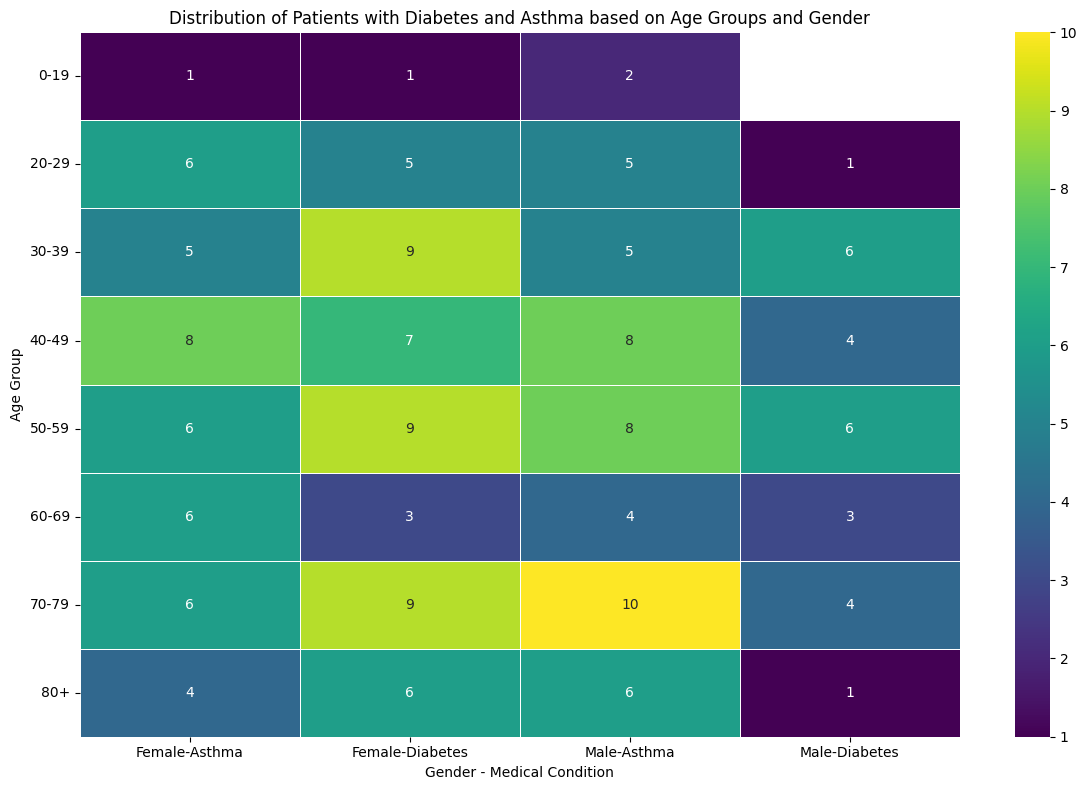

In [77]:
print("Goal6: Analyze the distribution of patients with diabetes and asthma based on age groups and gender.")
Query = """
WITH Diabetes_Asthma AS (
    SELECT 
        CASE 
            WHEN Age BETWEEN 0 AND 19 THEN '0-19'
            WHEN Age BETWEEN 20 AND 29 THEN '20-29'
            WHEN Age BETWEEN 30 AND 39 THEN '30-39'
            WHEN Age BETWEEN 40 AND 49 THEN '40-49'
            WHEN Age BETWEEN 50 AND 59 THEN '50-59'
            WHEN Age BETWEEN 60 AND 69 THEN '60-69'
            WHEN Age BETWEEN 70 AND 79 THEN '70-79'
            ELSE '80+'
        END AS Age_Group,
        Gender,
        Medical_Condition
    FROM 
        healthdata_stats 
    WHERE 
        Medical_Condition IN ('Diabetes', 'Asthma')
)
SELECT 
    Age_Group,
    Gender,
    Medical_Condition,
    COUNT(*) AS Number_of_Patients
FROM 
    Diabetes_Asthma
GROUP BY 
    Age_Group,
    Gender,
    Medical_Condition
ORDER BY 
    Age_Group, Gender, Medical_Condition;
"""

output = spark.sql(Query)
output.show()
result = output.toPandas()


Goal7: Identify the hospitals with the highest number of patients admitted for each medical condition (Diabetes and Asthma) and determine the average billing amount for these admissions.
+--------------------+-----------------+------------------+----------------------+
|            Hospital|Medical Condition|Number_of_Patients|Average_Billing_Amount|
+--------------------+-----------------+------------------+----------------------+
|         Wood-Krause|           Asthma|                 1|           1996.310721|
|       Cole and Sons|           Asthma|                 1|           4357.928047|
|            Tate Ltd|           Asthma|                 1|           33952.60919|
|          Rice Group|         Diabetes|                 1|           38068.85215|
|     Howell-Johnston|         Diabetes|                 1|           41814.42447|
|Sparks, Figueroa ...|         Diabetes|                 1|           44655.69908|
+--------------------+-----------------+------------------+-------

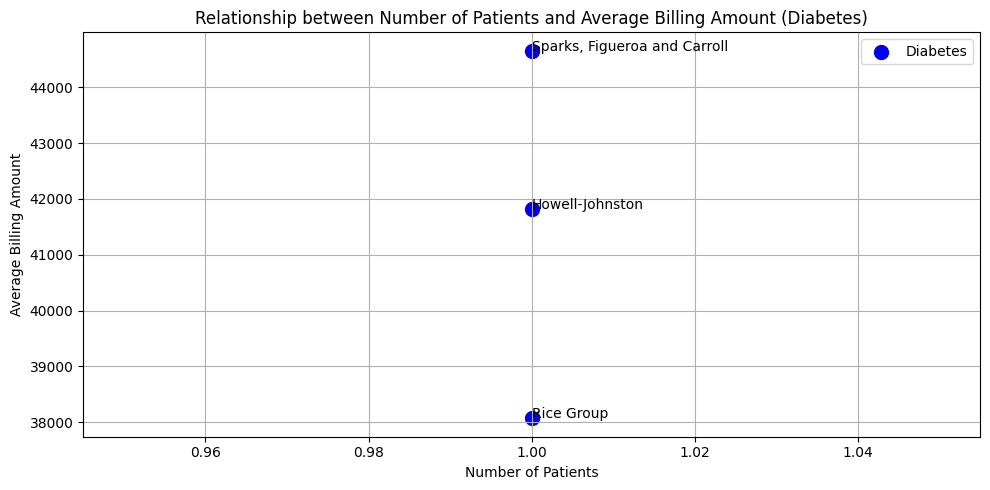

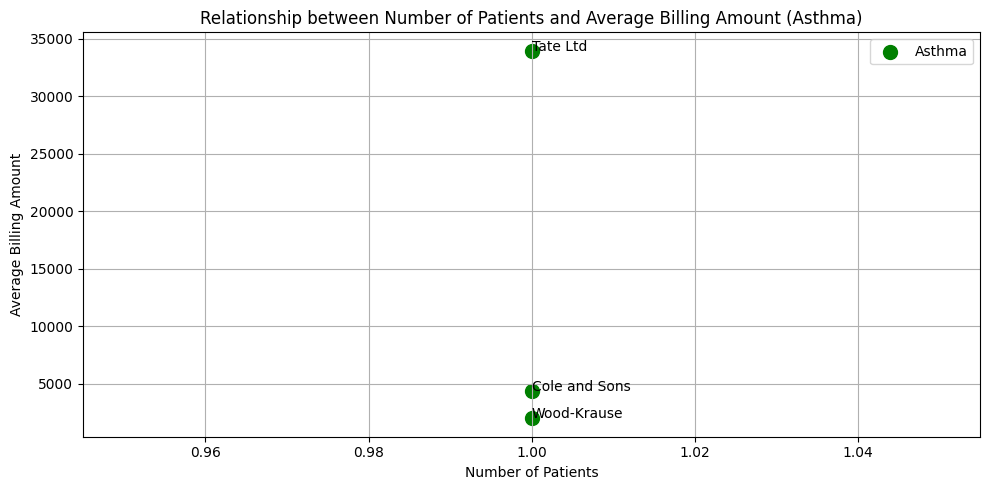

In [82]:
print("Goal7: Identify the hospitals with the highest number of patients admitted for each medical condition (Diabetes and Asthma) and determine the average billing amount for these admissions.")
Query = """
WITH Top_Hospitals AS (
    SELECT 
        Hospital,
        `Medical Condition`,
        COUNT(*) AS Number_of_Patients,
        AVG(`Billing Amount`) AS Average_Billing_Amount
    FROM 
        healthdata_stats 
    WHERE 
        `Medical Condition` IN ('Diabetes', 'Asthma')
    GROUP BY 
        Hospital,
        `Medical Condition`
),
Ranked_Hospitals AS (
    SELECT 
        *,
        ROW_NUMBER() OVER(PARTITION BY `Medical Condition` ORDER BY Number_of_Patients DESC) AS Rank
    FROM 
        Top_Hospitals
)
SELECT 
    Hospital,
    `Medical Condition`,
    Number_of_Patients,
    Average_Billing_Amount
FROM 
    Ranked_Hospitals
WHERE 
    Rank <= 3
ORDER BY 
    `Medical Condition`, Rank;
"""

output = spark.sql(Query)
output.show()
result = output.toPandas()

# Filter the DataFrame for Diabetes and Asthma
diabetes_data = result[result['Medical Condition'] == 'Diabetes'].sort_values(by='Number_of_Patients', ascending=False).head(3)
asthma_data = result[result['Medical Condition'] == 'Asthma'].sort_values(by='Number_of_Patients', ascending=False).head(3)

# Create a scatter plot for Diabetes
plt.figure(figsize=(10, 5))
plt.scatter(diabetes_data['Number_of_Patients'], diabetes_data['Average_Billing_Amount'], color='blue', label='Diabetes', s=100)
for i, txt in enumerate(diabetes_data['Hospital']):
    plt.annotate(txt, (diabetes_data['Number_of_Patients'].iloc[i], diabetes_data['Average_Billing_Amount'].iloc[i]))
plt.title('Relationship between Number of Patients and Average Billing Amount (Diabetes)')
plt.xlabel('Number of Patients')
plt.ylabel('Average Billing Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a scatter plot for Asthma
plt.figure(figsize=(10, 5))
plt.scatter(asthma_data['Number_of_Patients'], asthma_data['Average_Billing_Amount'], color='green', label='Asthma', s=100)
for i, txt in enumerate(asthma_data['Hospital']):
    plt.annotate(txt, (asthma_data['Number_of_Patients'].iloc[i], asthma_data['Average_Billing_Amount'].iloc[i]))
plt.title('Relationship between Number of Patients and Average Billing Amount (Asthma)')
plt.xlabel('Number of Patients')
plt.ylabel('Average Billing Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

To identify patients who have been admitted for the medical condition of diabetes, asthma, or hypertension and rank them based on their billing amount within each medical condition group. For each patient, retrieve their name, age, medical condition, billing amount, and rank.
+--------------------+---+-----------------+--------------+----+
|                Name|Age|Medical Condition|Billing Amount|Rank|
+--------------------+---+-----------------+--------------+----+
|       Kevin Johnson| 78|           Asthma|   9007.967866|   1|
|      Monica Stevens| 64|           Asthma|   8895.137288|   2|
|      Timothy Melton| 22|           Asthma|   8487.438712|   3|
|         Kathy Cross| 42|           Asthma|   7942.853286|   4|
|      Michelle Quinn| 74|           Asthma|   7164.886172|   5|
|       Jeffrey Cross| 75|           Asthma|   7140.773833|   6|
|       Robert Taylor| 19|           Asthma|     6850.9728|   7|
|       Ernest Peters| 43|           Asthma|   5974.970205|   8|
|  Jenni

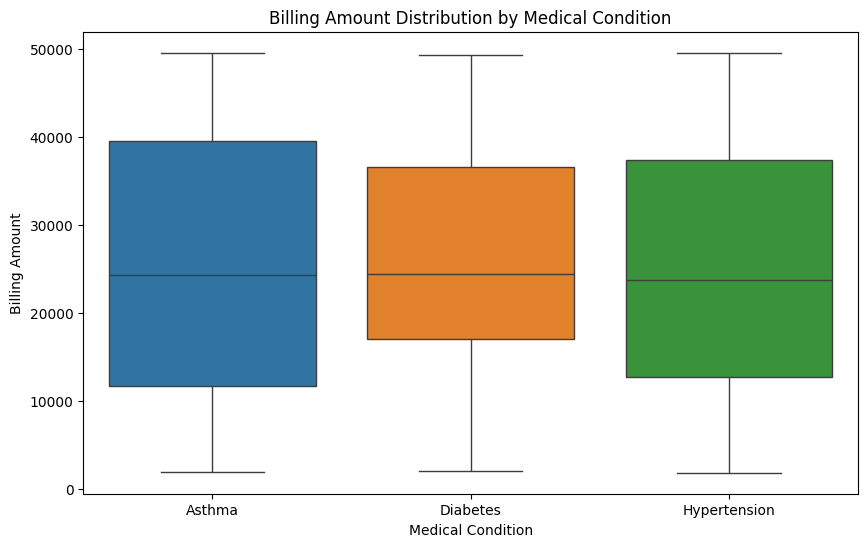

In [85]:
print("To identify patients who have been admitted for the medical condition of diabetes, asthma, or hypertension and rank them based on their billing amount within each medical condition group. For each patient, retrieve their name, age, medical condition, billing amount, and rank.")
Query = """
WITH RankedPatients AS (
    SELECT 
        Name,
        Age,
        `Medical Condition`,
        `Billing Amount`,
        ROW_NUMBER() OVER (PARTITION BY `Medical Condition` ORDER BY `Billing Amount` DESC) AS Rank
    FROM 
        healthdata_stats
    WHERE 
        `Medical Condition` IN ('Diabetes', 'Asthma', 'Hypertension')
)

SELECT 
    Name,
    Age,
    `Medical Condition`,
    `Billing Amount`,
    Rank
FROM 
    RankedPatients
ORDER BY 
    `Medical Condition`, Rank;

"""
output = spark.sql(Query)
output.show()
result = output.toPandas()

# Convert 'Billing Amount' to float for plotting
result['Billing Amount'] = result['Billing Amount'].astype(float)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=result, hue='Medical Condition')
plt.title('Billing Amount Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.show()